In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import os
import shutil
import zipfile
import numpy as np

In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./credentials.json"
mlflow.set_tracking_uri("http://34.176.189.11:5000")

In [10]:
activations_run_id = "e515ef2d217a4b15b9dc3d8997a0a1dc"

features_path = mlflow.artifacts.download_artifacts(
    run_id=activations_run_id, artifact_path="activations_data.zip"
)

folder_path = f"./activations_data_run_{activations_run_id}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
else:
    try:
        shutil.rmtree(folder_path)
    except FileNotFoundError:
        print(f"The folder '{folder_path}' does not exist.")
    os.makedirs(folder_path)

with zipfile.ZipFile(features_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [11]:
hidden_freqs = pd.read_csv(f"{folder_path}/activations_data/hidden_frequencies.csv")
feedforward_freqs = pd.read_csv(f"{folder_path}/activations_data/feedforward_frequencies.csv")

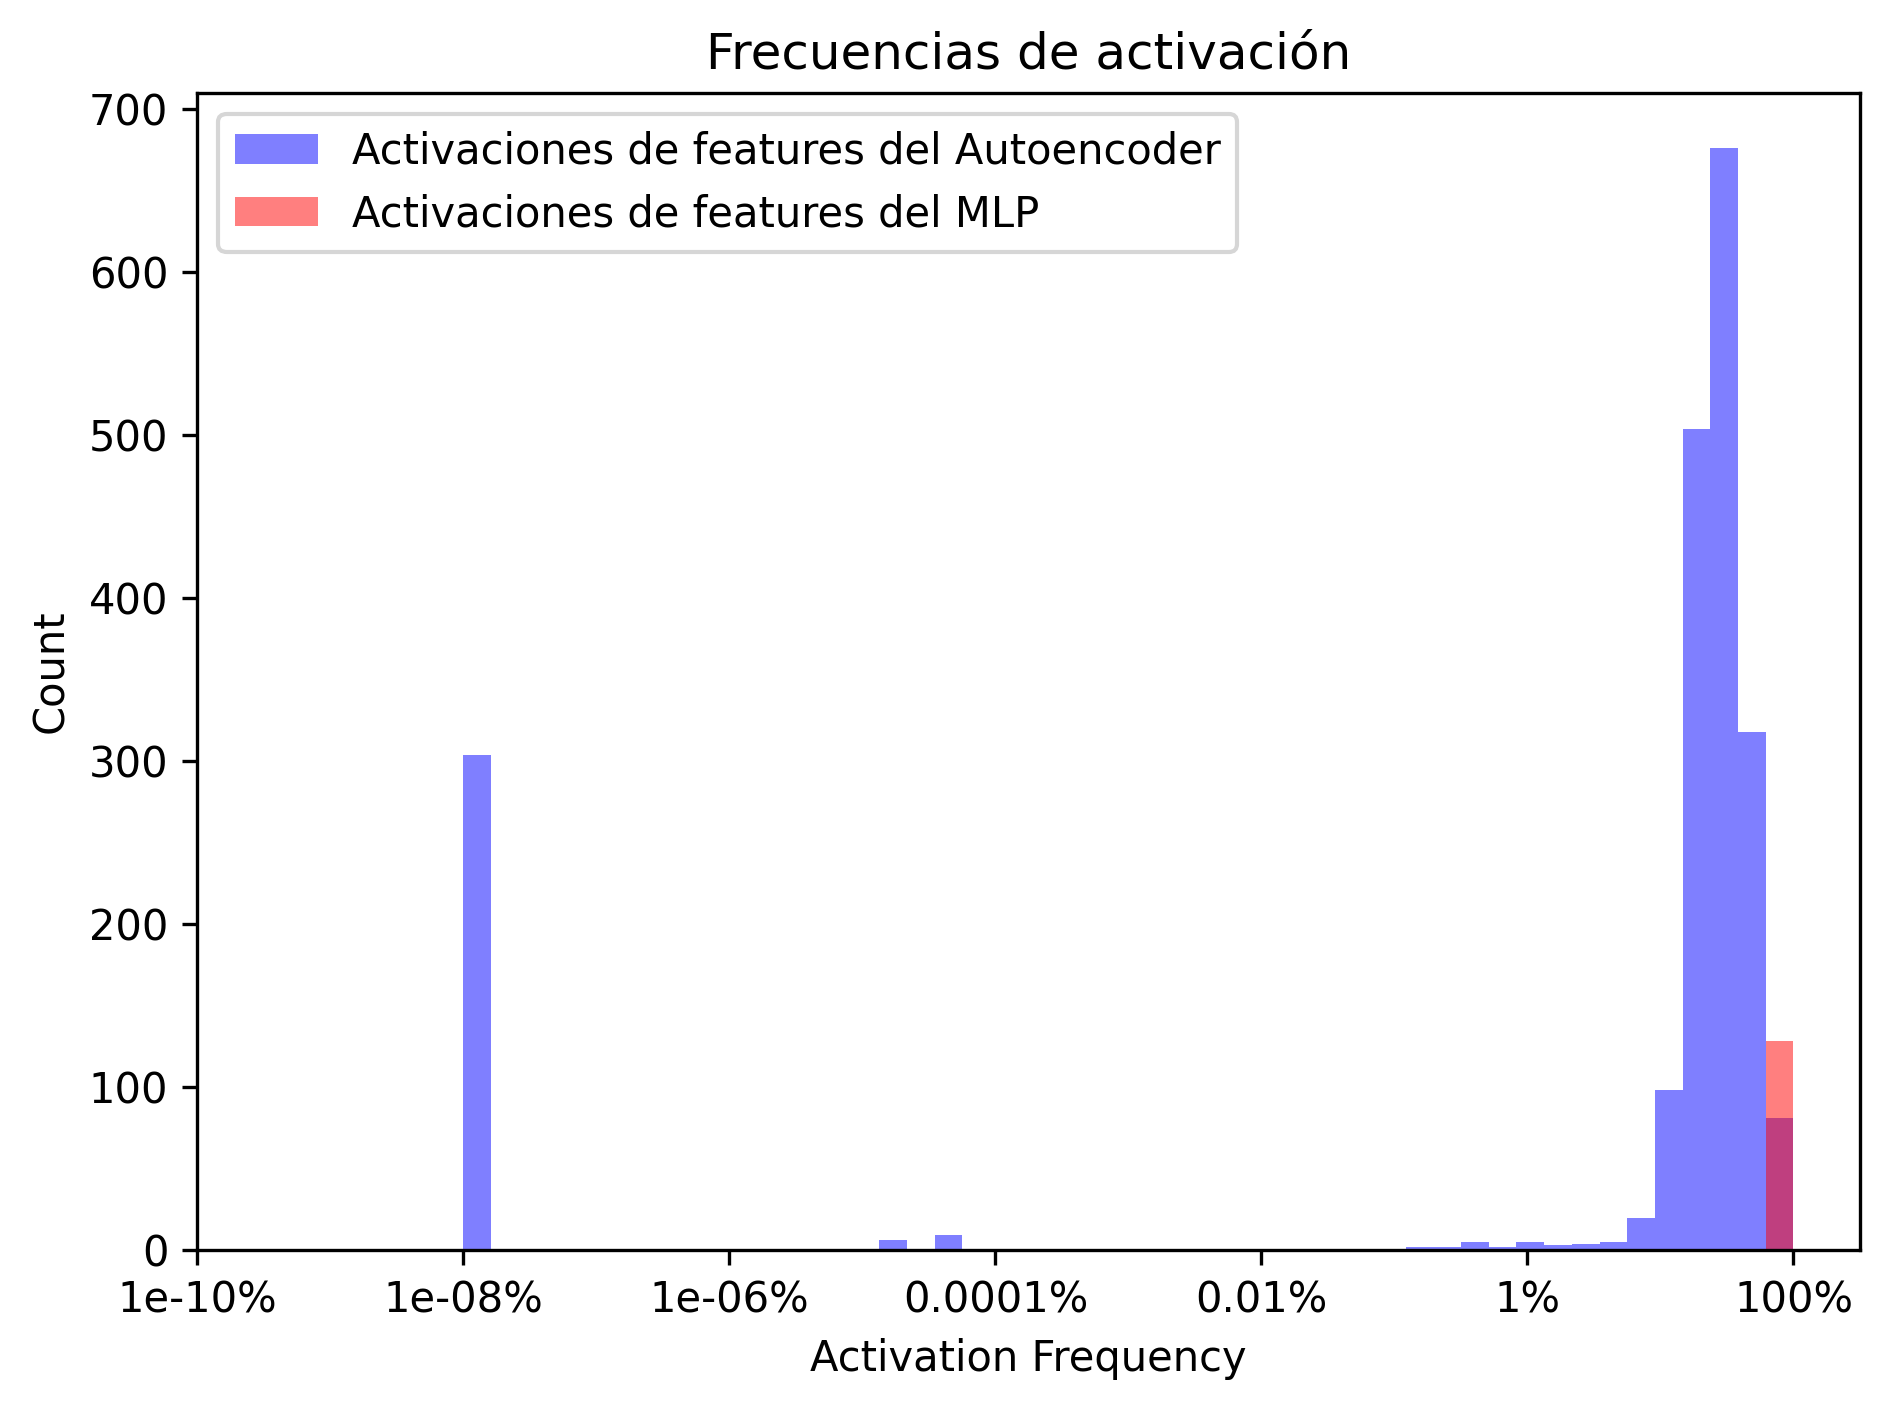

In [17]:
hiddens = hidden_freqs["frequency"] + 1e-10
log_hiddens = np.log10(hiddens)
log_feedforward = np.log10(feedforward_freqs["frequency"])
bins=np.histogram(np.hstack((log_hiddens, log_feedforward)), bins=48)[1]

plt.figure(dpi=300)
plt.title("Frecuencias de activación")
plt.hist(log_hiddens, bins=bins, color='blue', alpha=0.5, label=f"Activaciones de features del Autoencoder. Dimensión Rala: {hidden_freqs.shape[0]}")
plt.hist(log_feedforward, bins=bins, color='red', alpha=0.5, label=f"Activaciones de features del MLP. Embedding Size: {feedforward_freqs.shape[0]}")
plt.xlabel("Activation Frequency")
plt.ylabel("Count")
tick_locs = plt.xticks()[0][:-1]
tick_labels = [f"{100 * 10**x:.3g}%" for x in tick_locs]
plt.xticks(tick_locs, tick_labels)
plt.legend()
plt.tight_layout()
plt.show()

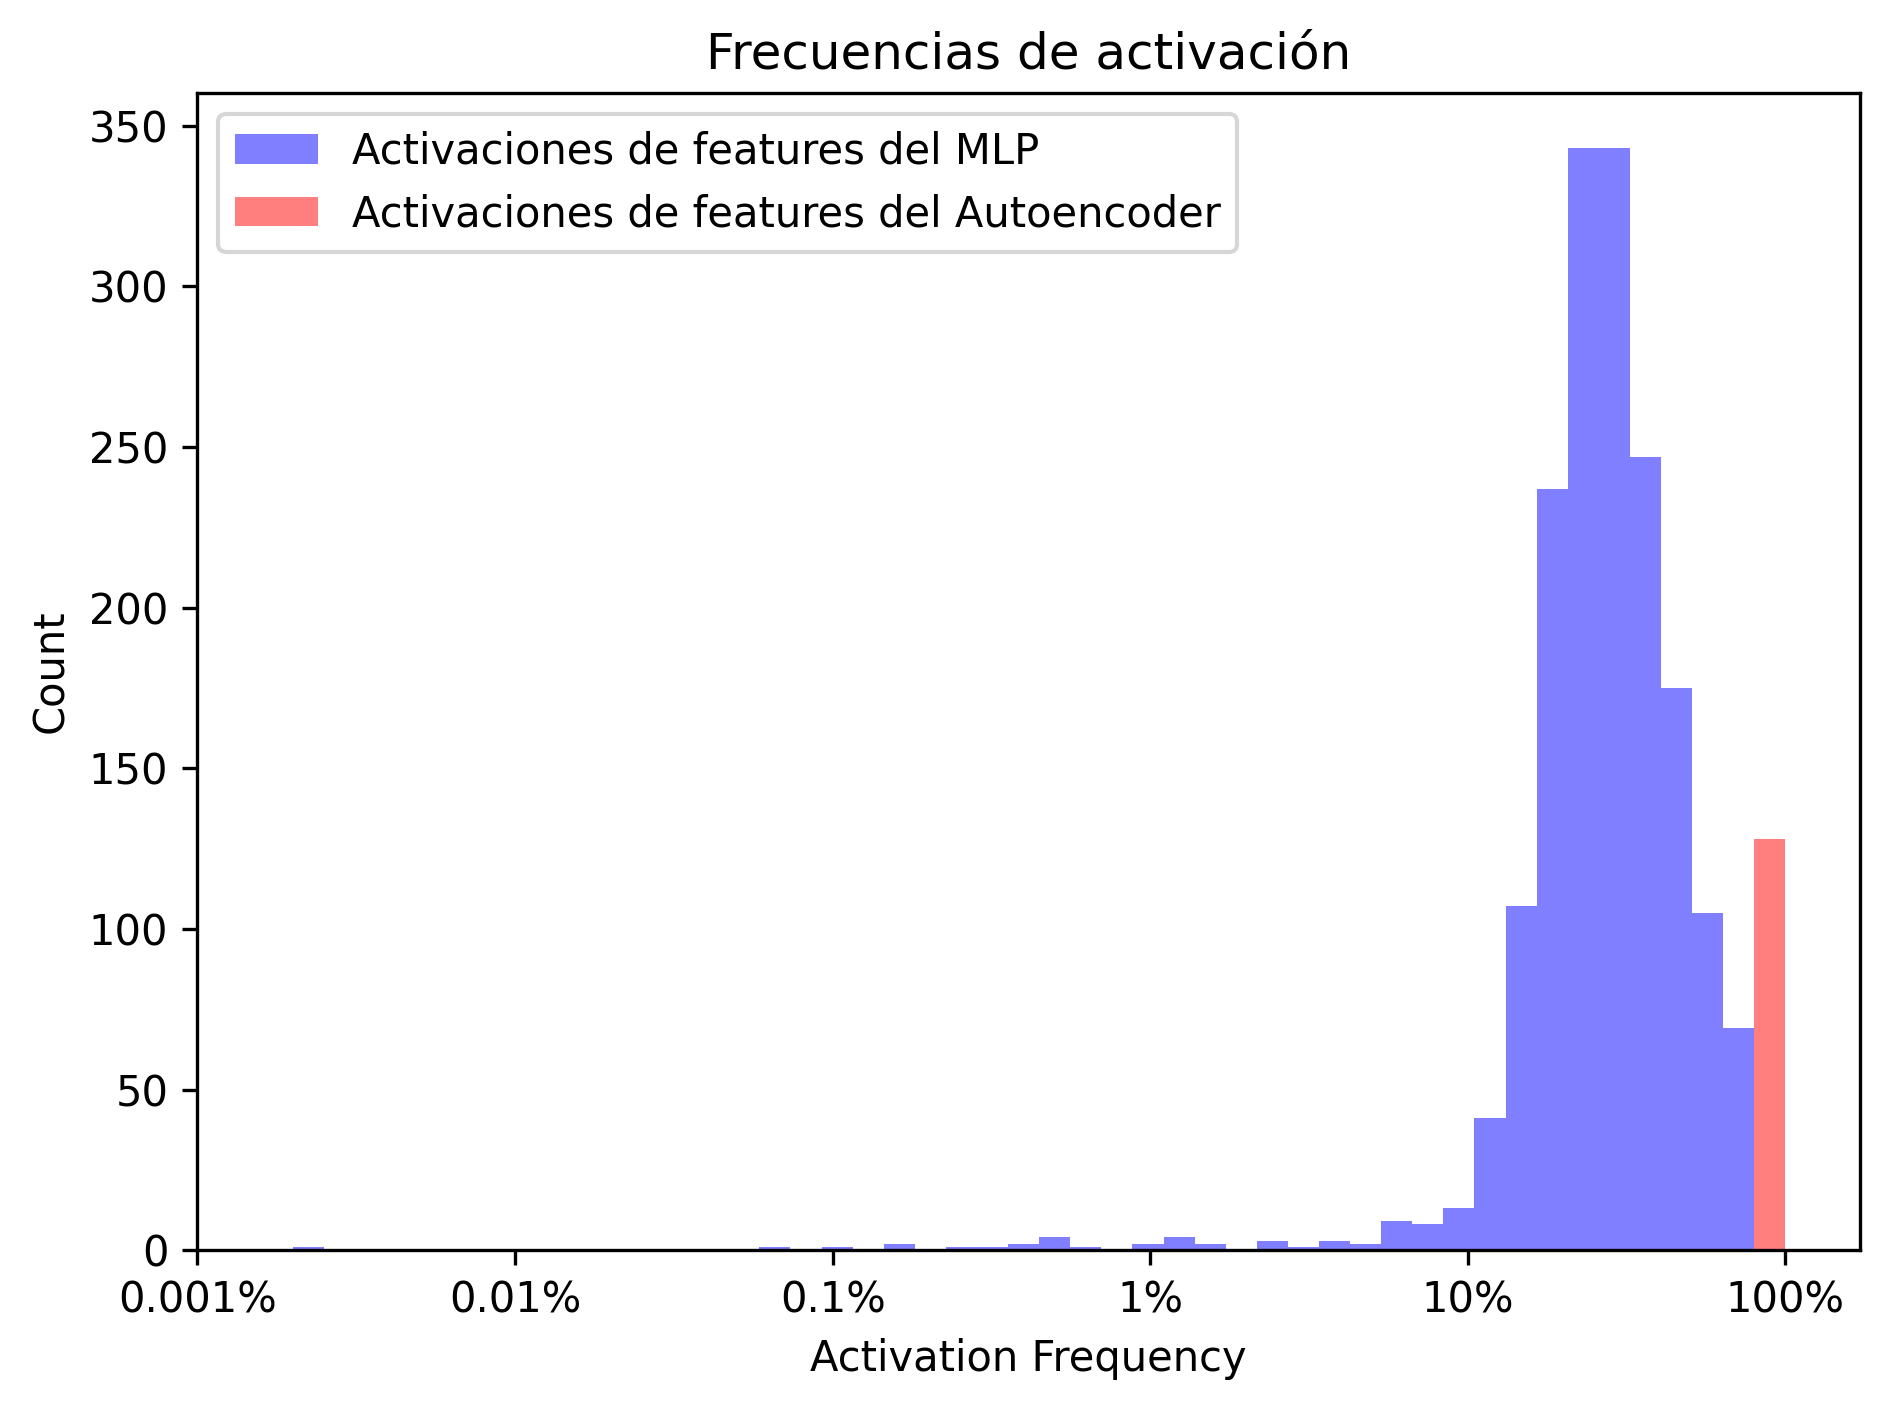

In [19]:
bins=np.histogram(np.hstack((log_hiddens[log_hiddens > -5], log_feedforward[log_feedforward > -5])), bins=48)[1]

plt.figure(dpi=300)
plt.title("Frecuencias de activación")
plt.hist(log_hiddens, bins=bins, color='blue', alpha=0.5, label=f"Activaciones de features del Autoencoder. Dimensión Rala: {hidden_freqs.shape[0]}")
plt.hist(log_feedforward, bins=bins, color='red', alpha=0.5, label=f"Activaciones de features del MLP. Embedding Size: {feedforward_freqs.shape[0]}")
plt.xlabel("Activation Frequency")
plt.ylabel("Count")
tick_locs = plt.xticks()[0][:-1]
tick_labels = [f"{100 * 10**x:.3g}%" for x in tick_locs]
plt.xticks(tick_locs, tick_labels)
plt.legend()
plt.tight_layout()
plt.show()